In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

In [174]:
employment_df = pd.read_csv('data/CNA27.20231016T221051.csv')
income_df = pd.read_csv('data/RAA02.20231109T231100.csv')
population_df= pd.read_csv('data/FY001.20231016T201055.csv')


#Fill all Nan with np.nan for consistency
employment_df.fillna(np.nan)
income_df.fillna(np.nan)
population_df.fillna(np.nan)

,Statistic Label,CensusYear,County,Sex,UNIT,VALUE
0,Population at Each Census,1841,State,Both sexes,Number,6528799
1,Population at Each Census,1841,State,Male,Number,3222485
2,Population at Each Census,1841,State,Female,Number,3306314
3,Population at Each Census,1841,Carlow,Both sexes,Number,86228
4,Population at Each Census,1841,Carlow,Male,Number,42428
...,...,...,...,...,...,...
2101,Population at Each Census,2022,Donegal,Male,Number,82795
2102,Population at Each Census,2022,Donegal,Female,Number,84289
2103,Population at Each Census,2022,Monaghan,Both sexes,Number,65288
2104,Population at Each Census,2022,Monaghan,Male,Number,32894


Check and explore the employment data

In [175]:
employment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Statistic Label          2880 non-null   object 
 1   Sex                      2880 non-null   object 
 2   Industry                 2880 non-null   object 
 3   Province County or City  2880 non-null   object 
 4   CensusYear               2880 non-null   int64  
 5   UNIT                     2880 non-null   object 
 6   VALUE                    2784 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 157.6+ KB


In [176]:
from scipy.stats import norm
norm.cdf(len(employment_df['VALUE']), employment_df['VALUE'].mean(), employment_df['VALUE'].std())

0.4295166263764681

In [177]:
employment_df.describe()

,CensusYear,VALUE
count,2880.000000,2.784000e+03
mean,2008.750000,1.879636e+04
std,5.262805,8.961664e+04
min,2002.000000,5.000000e+00
25%,2005.000000,1.412750e+03
50%,2008.500000,3.415500e+03
75%,2012.250000,8.693500e+03
max,2016.000000,2.006641e+06


In [178]:
employment_df.head()

,Statistic Label,Sex,Industry,Province County or City,CensusYear,UNIT,VALUE
0,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",State,2002,Number,97281.0
1,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",State,2006,Number,89277.0
2,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",State,2011,Number,94247.0
3,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",State,2016,Number,89116.0
4,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",Leinster,2002,Number,31795.0


In [179]:
employment_df.tail()

,Statistic Label,Sex,Industry,Province County or City,CensusYear,UNIT,VALUE
2875,Population 15 years and over at work,Both sexes,All industries,Donegal,2016,Number,58353.0
2876,Population 15 years and over at work,Both sexes,All industries,Monaghan,2002,Number,21101.0
2877,Population 15 years and over at work,Both sexes,All industries,Monaghan,2006,Number,25378.0
2878,Population 15 years and over at work,Both sexes,All industries,Monaghan,2011,Number,23005.0
2879,Population 15 years and over at work,Both sexes,All industries,Monaghan,2016,Number,25549.0


In [180]:
employment_df.dtypes

Statistic Label             object
Sex                         object
Industry                    object
Province County or City     object
CensusYear                   int64
UNIT                        object
VALUE                      float64
dtype: object

In [181]:
# UNIT just says want kinda variable it is. Not needed
employment_df = employment_df.drop(['UNIT'], axis=1)
employment_df = employment_df.rename(columns={'Province County or City':'County'})

In [182]:
employment_df.count()

Statistic Label    2880
Sex                2880
Industry           2880
County             2880
CensusYear         2880
VALUE              2784
dtype: int64

In [183]:
print(employment_df.isnull().sum()) 

Statistic Label     0
Sex                 0
Industry            0
County              0
CensusYear          0
VALUE              96
dtype: int64


In [184]:
employment_df[employment_df['County'] == 'Tipperary']

,Statistic Label,Sex,Industry,County,CensusYear,VALUE
108,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",Tipperary,2002,7020.0
109,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",Tipperary,2006,6784.0
110,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",Tipperary,2011,6817.0
111,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",Tipperary,2016,6740.0
288,Population 15 years and over at work,Both sexes,"Mining, quarrying and turf production",Tipperary,2002,575.0
...,...,...,...,...,...,...
2631,Population 15 years and over at work,Both sexes,Industry not stated,Tipperary,2016,4753.0
2808,Population 15 years and over at work,Both sexes,All industries,Tipperary,2002,56325.0
2809,Population 15 years and over at work,Both sexes,All industries,Tipperary,2006,65183.0
2810,Population 15 years and over at work,Both sexes,All industries,Tipperary,2011,60332.0


In [185]:
#Seems that the various missing values are are those that were merged/ deprecated
null_df = employment_df[employment_df['VALUE'].isnull()]
null_df['County'].unique()

array(['Limerick City', 'Limerick County', 'North Tipperary',
       'South Tipperary', 'Waterford City', 'Waterford County'],
      dtype=object)

#Income Data   

In [186]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8505 entries, 0 to 8504
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  8505 non-null   object 
 1   Year             8505 non-null   int64  
 2   County           8505 non-null   object 
 3   UNIT             8505 non-null   object 
 4   VALUE            8505 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 332.4+ KB


In [187]:
income_df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [188]:
income_target_stats_list = ["Compensation of Employees (i.e. Wages and Salaries, Benefits in kind, Employers' social insurance contribution)",
                            "Income of Self Employed",
                            "Primary Income",
                            "Total Household Income",
                            "Disposable Household Income"]

income_df['Statistic Label'].unique()

array(["Compensation of Employees (i.e. Wages and Salaries, Benefits in kind, Employers' social insurance contribution)",
       'Income of Self Employed',
       'Rent of dwellings (including imputed rent of owner-occupied dwellings)',
       'Net Interest and Dividends (payments by households of interest are deducted from interest received by households)',
       'Primary Income', 'Social Benefits and Other Current Transfers',
       'Total Household Income', 'Total Income per Person',
       'Index of Total Income per Person', 'Current Taxes on Income',
       'Disposable Household Income', 'Disposable Income per Person',
       'Index of Disposable Income per Person',
       'Disposable Income per Person (excluding Rent)',
       'Index of Disposable Income per Person (excluding Rent)'],
      dtype=object)

In [189]:
income_df['County'].unique()

#Need to get the county/state name in the same format as the rest of the datasets
def standardise_county_names(x):
    
    if x == 'Ireland':
        return 'State'
    else:
        x = x.split(sep='.')[1]
        #There is a leading whitespace that we need to remove once we split the county names
        x = x.replace(" ", "")
        return x

income_df['County'] = income_df['County'].apply(lambda x: standardise_county_names(x))
income_df

,Statistic Label,Year,County,UNIT,VALUE
0,Compensation of Employees (i.e. Wages and Sala...,2000,State,Euro Million,42023.34
1,Compensation of Employees (i.e. Wages and Sala...,2000,Carlow,Euro Million,420.67
2,Compensation of Employees (i.e. Wages and Sala...,2000,Cavan,Euro Million,444.71
3,Compensation of Employees (i.e. Wages and Sala...,2000,Clare,Euro Million,1017.44
4,Compensation of Employees (i.e. Wages and Sala...,2000,Cork,Euro Million,4484.87
...,...,...,...,...,...
8500,Index of Disposable Income per Person (excludi...,2020,Tipperary,State=100,95.25
8501,Index of Disposable Income per Person (excludi...,2020,Waterford,State=100,94.53
8502,Index of Disposable Income per Person (excludi...,2020,Westmeath,State=100,85.51
8503,Index of Disposable Income per Person (excludi...,2020,Wexford,State=100,89.09


In [190]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8505 entries, 0 to 8504
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  8505 non-null   object 
 1   Year             8505 non-null   int64  
 2   County           8505 non-null   object 
 3   UNIT             8505 non-null   object 
 4   VALUE            8505 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 332.4+ KB


In [191]:
income_df.dtypes

Statistic Label     object
Year                 int64
County              object
UNIT                object
VALUE              float64
dtype: object

In [192]:
income_df.head()

,Statistic Label,Year,County,UNIT,VALUE
0,Compensation of Employees (i.e. Wages and Sala...,2000,State,Euro Million,42023.34
1,Compensation of Employees (i.e. Wages and Sala...,2000,Carlow,Euro Million,420.67
2,Compensation of Employees (i.e. Wages and Sala...,2000,Cavan,Euro Million,444.71
3,Compensation of Employees (i.e. Wages and Sala...,2000,Clare,Euro Million,1017.44
4,Compensation of Employees (i.e. Wages and Sala...,2000,Cork,Euro Million,4484.87


In [193]:
income_df.tail()

,Statistic Label,Year,County,UNIT,VALUE
8500,Index of Disposable Income per Person (excludi...,2020,Tipperary,State=100,95.25
8501,Index of Disposable Income per Person (excludi...,2020,Waterford,State=100,94.53
8502,Index of Disposable Income per Person (excludi...,2020,Westmeath,State=100,85.51
8503,Index of Disposable Income per Person (excludi...,2020,Wexford,State=100,89.09
8504,Index of Disposable Income per Person (excludi...,2020,Wicklow,State=100,97.60


In [194]:
income_df.iloc[:, 0]


0       Compensation of Employees (i.e. Wages and Sala...
1       Compensation of Employees (i.e. Wages and Sala...
2       Compensation of Employees (i.e. Wages and Sala...
3       Compensation of Employees (i.e. Wages and Sala...
4       Compensation of Employees (i.e. Wages and Sala...
                              ...                        
8500    Index of Disposable Income per Person (excludi...
8501    Index of Disposable Income per Person (excludi...
8502    Index of Disposable Income per Person (excludi...
8503    Index of Disposable Income per Person (excludi...
8504    Index of Disposable Income per Person (excludi...
Name: Statistic Label, Length: 8505, dtype: object

Population

In [195]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Statistic Label  2106 non-null   object
 1   CensusYear       2106 non-null   int64 
 2   County           2106 non-null   object
 3   Sex              2106 non-null   object
 4   UNIT             2106 non-null   object
 5   VALUE            2106 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 98.8+ KB


In [196]:
population_df.describe()

,CensusYear,VALUE
count,2106.000000,2.106000e+03
mean,1946.576923,1.849786e+05
std,53.843841,5.140124e+05
min,1841.000000,1.201300e+04
25%,1901.000000,3.661700e+04
50%,1958.500000,6.349050e+04
75%,1991.000000,1.118672e+05
max,2022.000000,6.528799e+06


In [197]:
population_df.head()

,Statistic Label,CensusYear,County,Sex,UNIT,VALUE
0,Population at Each Census,1841,State,Both sexes,Number,6528799
1,Population at Each Census,1841,State,Male,Number,3222485
2,Population at Each Census,1841,State,Female,Number,3306314
3,Population at Each Census,1841,Carlow,Both sexes,Number,86228
4,Population at Each Census,1841,Carlow,Male,Number,42428


In [198]:
population_df.tail()

,Statistic Label,CensusYear,County,Sex,UNIT,VALUE
2101,Population at Each Census,2022,Donegal,Male,Number,82795
2102,Population at Each Census,2022,Donegal,Female,Number,84289
2103,Population at Each Census,2022,Monaghan,Both sexes,Number,65288
2104,Population at Each Census,2022,Monaghan,Male,Number,32894
2105,Population at Each Census,2022,Monaghan,Female,Number,32394


Joining all the tables on the basis of County and CensusYear

In [199]:
population_df = population_df[population_df['CensusYear'] >=2002]
population_df = population_df[population_df['Sex'] == 'Both sexes']
population_df = population_df[['CensusYear', 'County', 'VALUE']].rename(columns={'VALUE':'Population', 'CensusYear':'Year'})
population_df


,Year,County,Population
1701,2002,State,3917203
1704,2002,Carlow,46014
1707,2002,Dublin,1122821
1710,2002,Kildare,163944
1713,2002,Kilkenny,80339
...,...,...,...
2091,2022,Roscommon,70259
2094,2022,Sligo,70198
2097,2022,Cavan,81704
2100,2022,Donegal,167084


In [200]:
income_df = income_df[income_df['Statistic Label']=="Total Household Income"]
income_df = income_df[['Year', 'County', 'VALUE']].rename(columns={'VALUE':'EarningsEuro'}).reset_index(drop=True)
income_df

,Year,County,EarningsEuro
0,2000,State,67579.81
1,2000,Carlow,700.62
2,2000,Cavan,823.57
3,2000,Clare,1670.60
4,2000,Cork,7377.09
...,...,...,...
562,2020,Tipperary,4880.07
563,2020,Waterford,3592.69
564,2020,Westmeath,2418.09
565,2020,Wexford,4196.16


In [201]:
income_df.loc[(income_df['Year']==2016) & (income_df['County']==' Monaghan')]

,Year,County,EarningsEuro


In [202]:
employment_df

,Statistic Label,Sex,Industry,County,CensusYear,VALUE
0,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",State,2002,97281.0
1,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",State,2006,89277.0
2,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",State,2011,94247.0
3,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",State,2016,89116.0
4,Population 15 years and over at work,Both sexes,"Agriculture, forestry and fishing",Leinster,2002,31795.0
...,...,...,...,...,...,...
2875,Population 15 years and over at work,Both sexes,All industries,Donegal,2016,58353.0
2876,Population 15 years and over at work,Both sexes,All industries,Monaghan,2002,21101.0
2877,Population 15 years and over at work,Both sexes,All industries,Monaghan,2006,25378.0
2878,Population 15 years and over at work,Both sexes,All industries,Monaghan,2011,23005.0


In [203]:
employment_df = employment_df[employment_df['CensusYear'] >= 2002].rename(columns={'CensusYear':'Year', 'VALUE':'WorkingPopulation'})
employment_df = employment_df[~employment_df['County'].isin(['Leinster', 'Munster', 'Ulster', 'Conn'])]
employment_df = employment_df[['Year', 'Industry', 'County', 'WorkingPopulation']]
employment_df

,Year,Industry,County,WorkingPopulation
0,2002,"Agriculture, forestry and fishing",State,97281.0
1,2006,"Agriculture, forestry and fishing",State,89277.0
2,2011,"Agriculture, forestry and fishing",State,94247.0
3,2016,"Agriculture, forestry and fishing",State,89116.0
8,2002,"Agriculture, forestry and fishing",Carlow,1581.0
...,...,...,...,...
2875,2016,All industries,Donegal,58353.0
2876,2002,All industries,Monaghan,21101.0
2877,2006,All industries,Monaghan,25378.0
2878,2011,All industries,Monaghan,23005.0


In [204]:
joint_df = employment_df.merge(right=population_df,
                               on=['Year', 'County'],
                               how='left')

#Join won't work properly, so we need to loop and join one at a time
for index, row in joint_df.iterrows():
    
    earnings = income_df['EarningsEuro'].loc[(income_df['Year']==row['Year']) & (income_df['County']==row['County'])].values

    #Print to troubleshoot
    print(f'Year:{row["Year"]}, County:{row["County"]}')
    print(earnings)
    print(len(earnings))
    
    if len(earnings) > 0:
        joint_df.loc[index, 'EarningsEuro'] = earnings[0]
    else:
        joint_df.loc[index, 'EarningsEuro'] = 0

joint_df.dropna(inplace=True)
joint_df.reset_index(drop=True)
joint_df['pctIndustryEmployement'] = joint_df['WorkingPopulation']/joint_df['Population'] * 100
joint_df.to_csv('data/joined_data.csv', index=False)
joint_df[joint_df['County'] != 'State'].to_csv('data/joined_data(without_state).csv', index=False)
joint_df

Year:2002, County:State
[80847.45]
1
Year:2006, County:State
[112227.39]
1
Year:2011, County:State
[114239.67]
1
Year:2016, County:State
[132583.2]
1
Year:2002, County:Carlow
[809.06]
1
Year:2006, County:Carlow
[1187.51]
1
Year:2011, County:Carlow
[1236.43]
1
Year:2016, County:Carlow
[1406.4]
1
Year:2002, County:Dublin
[27289.04]
1
Year:2006, County:Dublin
[36109.1]
1
Year:2011, County:Dublin
[37612.95]
1
Year:2016, County:Dublin
[45235.86]
1
Year:2002, County:Dublin City
[]
0
Year:2006, County:Dublin City
[]
0
Year:2011, County:Dublin City
[]
0
Year:2016, County:Dublin City
[]
0
Year:2002, County:Dún Laoghaire-Rathdown
[]
0
Year:2006, County:Dún Laoghaire-Rathdown
[]
0
Year:2011, County:Dún Laoghaire-Rathdown
[]
0
Year:2016, County:Dún Laoghaire-Rathdown
[]
0
Year:2002, County:Fingal
[]
0
Year:2006, County:Fingal
[]
0
Year:2011, County:Fingal
[]
0
Year:2016, County:Fingal
[]
0
Year:2002, County:South Dublin
[]
0
Year:2006, County:South Dublin
[]
0
Year:2011, County:South Dublin
[]
0
Y

Year:2011, County:Leitrim
[722.52]
1
Year:2016, County:Leitrim
[758.26]
1
Year:2002, County:Mayo
[2069.46]
1
Year:2006, County:Mayo
[2794.7]
1
Year:2011, County:Mayo
[2813.34]
1
Year:2016, County:Mayo
[3021.68]
1
Year:2002, County:Roscommon
[967.07]
1
Year:2006, County:Roscommon
[1381.36]
1
Year:2011, County:Roscommon
[1364.72]
1
Year:2016, County:Roscommon
[1482.21]
1
Year:2002, County:Sligo
[1068.23]
1
Year:2006, County:Sligo
[1494.86]
1
Year:2011, County:Sligo
[1482.28]
1
Year:2016, County:Sligo
[1600.14]
1
Year:2002, County:Ulster (part of)
[]
0
Year:2006, County:Ulster (part of)
[]
0
Year:2011, County:Ulster (part of)
[]
0
Year:2016, County:Ulster (part of)
[]
0
Year:2002, County:Cavan
[990.59]
1
Year:2006, County:Cavan
[1472.28]
1
Year:2011, County:Cavan
[1540.72]
1
Year:2016, County:Cavan
[1752.67]
1
Year:2002, County:Donegal
[2111.18]
1
Year:2006, County:Donegal
[2941.41]
1
Year:2011, County:Donegal
[3104.24]
1
Year:2016, County:Donegal
[3230.88]
1
Year:2002, County:Monaghan
[9

PermissionError: [Errno 13] Permission denied: 'data/joined_data(without_state).csv'

In [ ]:
joint_df['Year'].unique()

array([2002, 2006, 2011, 2016], dtype=int64)

In [ ]:
joint_df.describe().apply(lambda x: x.apply('{0:.2f}'.format))

,Year,WorkingPopulation,Population,EarningsEuro,pctIndustryEmployement
count,1728.00,1728.00,1728.00,1728.00,1728.00
mean,2008.75,17096.37,324206.81,8146.25,5.11
std,5.26,96968.73,829368.89,21424.73,9.41
min,2002.00,32.00,25799.00,445.61,0.02
25%,2005.00,1311.75,65499.50,1482.26,1.67
50%,2008.50,2900.50,116896.00,2647.19,2.51
75%,2012.25,6098.00,161560.50,3772.28,4.22
max,2016.00,2006641.00,4761865.00,132583.20,49.15


In [218]:
joint_df[(joint_df['County'] != 'State') & (joint_df['Industry'] != 'All Industry')].describe().apply(lambda x: x.apply('{0:.2f}'.format))

,Year,WorkingPopulation,Population,EarningsEuro,pctIndustryEmployement
count,1664.00,1664.00,1664.00,1664.00,1664.00
mean,2008.75,8876.96,168338.15,4229.79,5.10
std,5.26,31988.02,232151.97,6998.97,9.40
min,2002.00,32.00,25799.00,445.61,0.02
25%,2005.00,1259.25,65180.75,1479.73,1.64
50%,2008.50,2761.00,115426.00,2545.65,2.52
75%,2012.25,5483.50,158863.50,3570.85,4.22
max,2016.00,614776.00,1347359.00,45235.86,49.15


In [205]:
joint_df

,Year,Industry,County,WorkingPopulation,Population,EarningsEuro,pctIndustryEmployement
0,2002,"Agriculture, forestry and fishing",State,97281.0,3917203.0,80847.45,2.483430
1,2006,"Agriculture, forestry and fishing",State,89277.0,4239848.0,112227.39,2.105665
2,2011,"Agriculture, forestry and fishing",State,94247.0,4588252.0,114239.67,2.054094
3,2016,"Agriculture, forestry and fishing",State,89116.0,4761865.0,132583.20,1.871452
4,2002,"Agriculture, forestry and fishing",Carlow,1581.0,46014.0,809.06,3.435911
...,...,...,...,...,...,...,...
2747,2016,All industries,Donegal,58353.0,159192.0,3230.88,36.655736
2748,2002,All industries,Monaghan,21101.0,52593.0,914.77,40.121309
2749,2006,All industries,Monaghan,25378.0,55997.0,1296.83,45.320285
2750,2011,All industries,Monaghan,23005.0,60483.0,1274.55,38.035481


Text(0, 0.5, 'EarningsEuro')

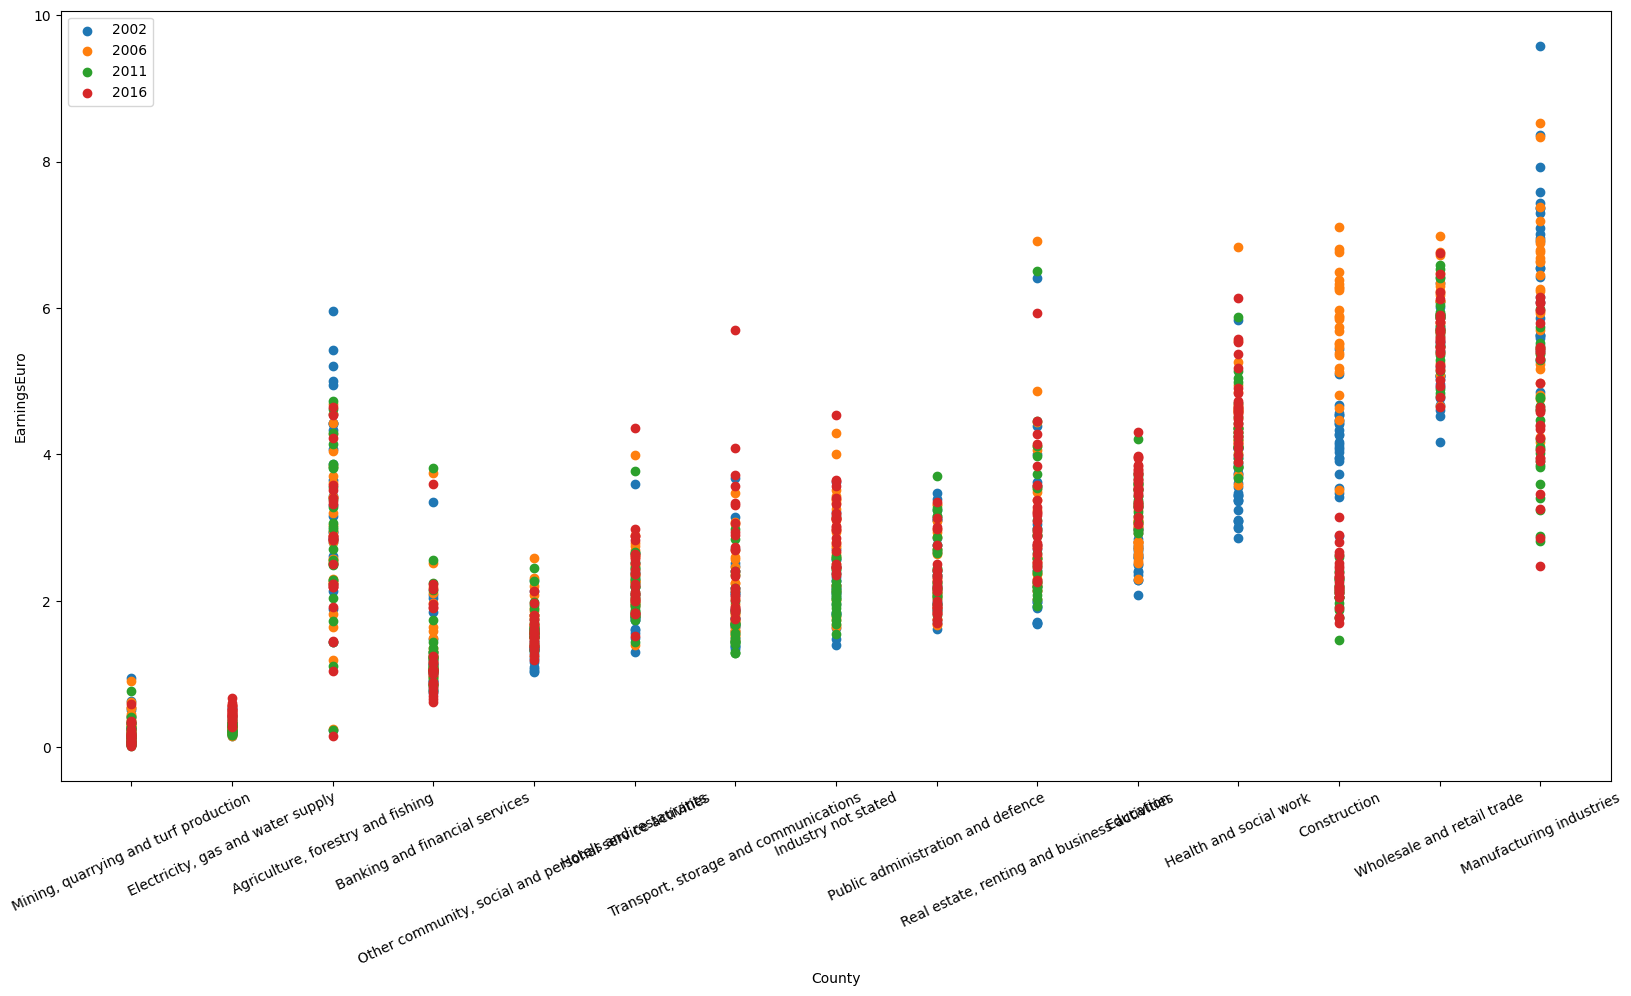

In [221]:
employement_by_ind = joint_df[joint_df['County'] != 'State']
employement_by_ind = employement_by_ind[employement_by_ind['Industry'] != 'All industries']

fig, ax = plt.subplots(figsize=(20, 10))

employement_by_ind = employement_by_ind[['WorkingPopulation', 'Industry', 'Year', 'County', 'pctIndustryEmployement']]


employement_by_ind_2002 = employement_by_ind[employement_by_ind['Year']==2002].sort_values(by='pctIndustryEmployement').drop_duplicates()
employement_by_ind_2006 = employement_by_ind[employement_by_ind['Year']==2006].sort_values(by='pctIndustryEmployement').drop_duplicates()
employement_by_ind_2011 = employement_by_ind[employement_by_ind['Year']==2011].sort_values(by='pctIndustryEmployement').drop_duplicates()
employement_by_ind_2016 = employement_by_ind[employement_by_ind['Year']==2016].sort_values(by='pctIndustryEmployement').drop_duplicates()


# Rotating X-axis labels
plt.xticks(rotation = 25)
ax.scatter(employement_by_ind_2002['Industry'], employement_by_ind_2002['pctIndustryEmployement'], label='2002')
ax.scatter(employement_by_ind_2006['Industry'], employement_by_ind_2006['pctIndustryEmployement'], label='2006')
ax.scatter(employement_by_ind_2011['Industry'], employement_by_ind_2011['pctIndustryEmployement'], label='2011')
ax.scatter(employement_by_ind_2016['Industry'], employement_by_ind_2016['pctIndustryEmployement'], label='2016')
ax.legend()
plt.xlabel('County')
plt.ylabel('EarningsEuro')


#Visual representation of the relationships between the various variables 

Text(0, 0.5, 'EarningsEuro')

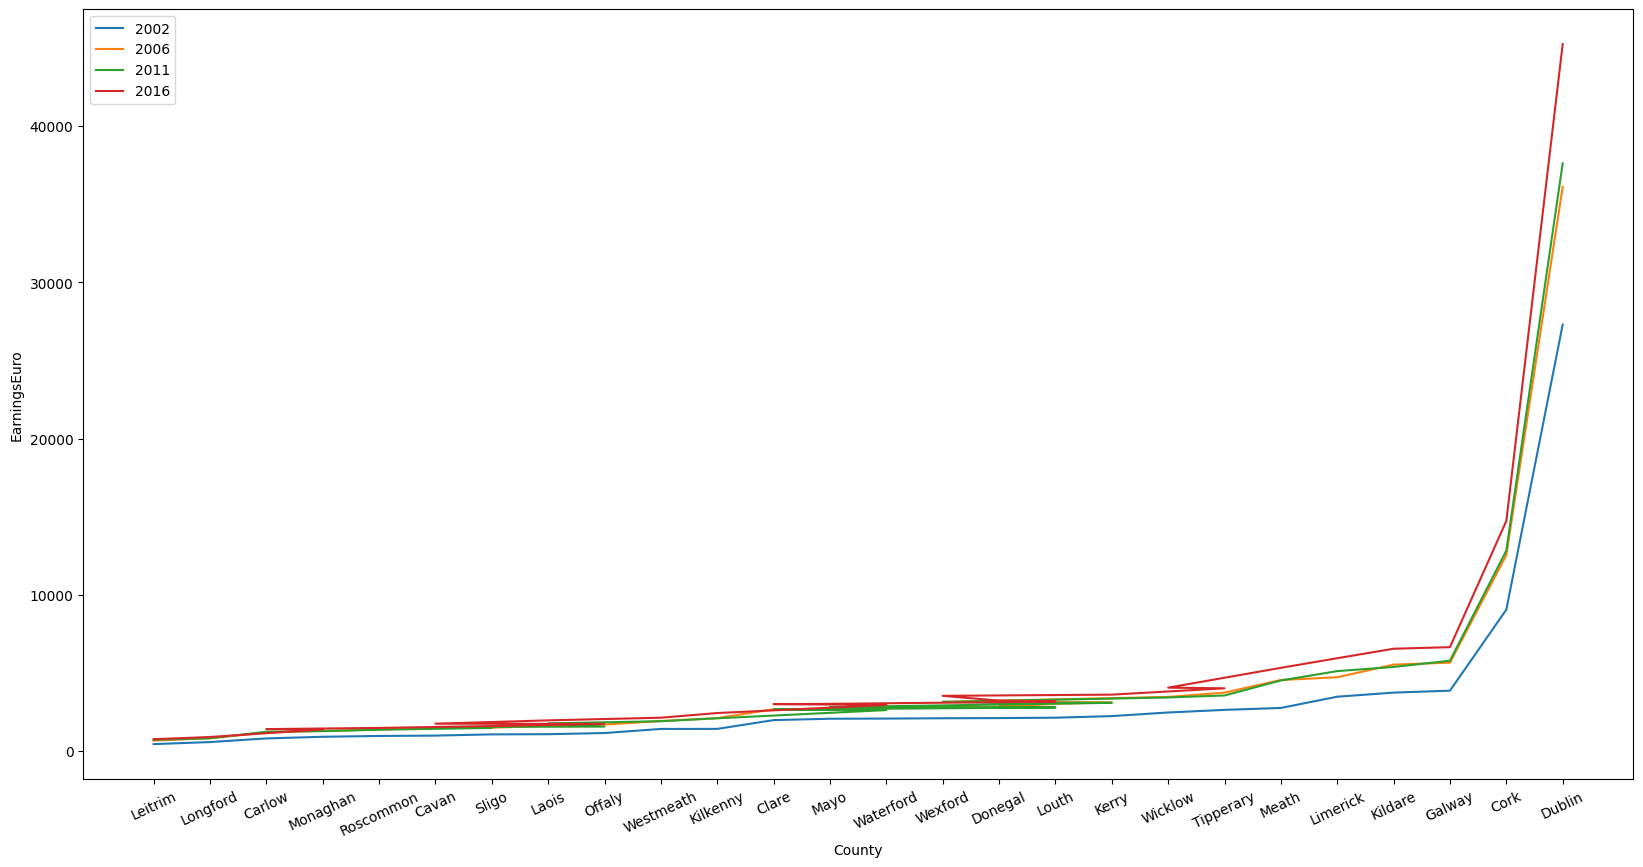

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

county_income = joint_df[['County', 'EarningsEuro', 'Year']]

county_income = county_income[county_income['County'] != 'State']

county_income_2002 = county_income[county_income['Year']==2002].sort_values(by='EarningsEuro').drop_duplicates()
county_income_2006 = county_income[county_income['Year']==2006].sort_values(by='EarningsEuro').drop_duplicates()
county_income_2011 = county_income[county_income['Year']==2011].sort_values(by='EarningsEuro').drop_duplicates()
county_income_2016 = county_income[county_income['Year']==2016].sort_values(by='EarningsEuro').drop_duplicates()


# Rotating X-axis labels
plt.xticks(rotation = 25)
ax.plot(county_income_2002['County'], county_income_2002['EarningsEuro'], label='2002')
ax.plot(county_income_2006['County'], county_income_2006['EarningsEuro'], label='2006')
ax.plot(county_income_2011['County'], county_income_2011['EarningsEuro'], label='2011')
ax.plot(county_income_2016['County'], county_income_2016['EarningsEuro'], label='2016')
ax.legend()
plt.xlabel('County')
plt.ylabel('EarningsEuro')


Text(0, 0.5, 'pctIndustryEmployement')

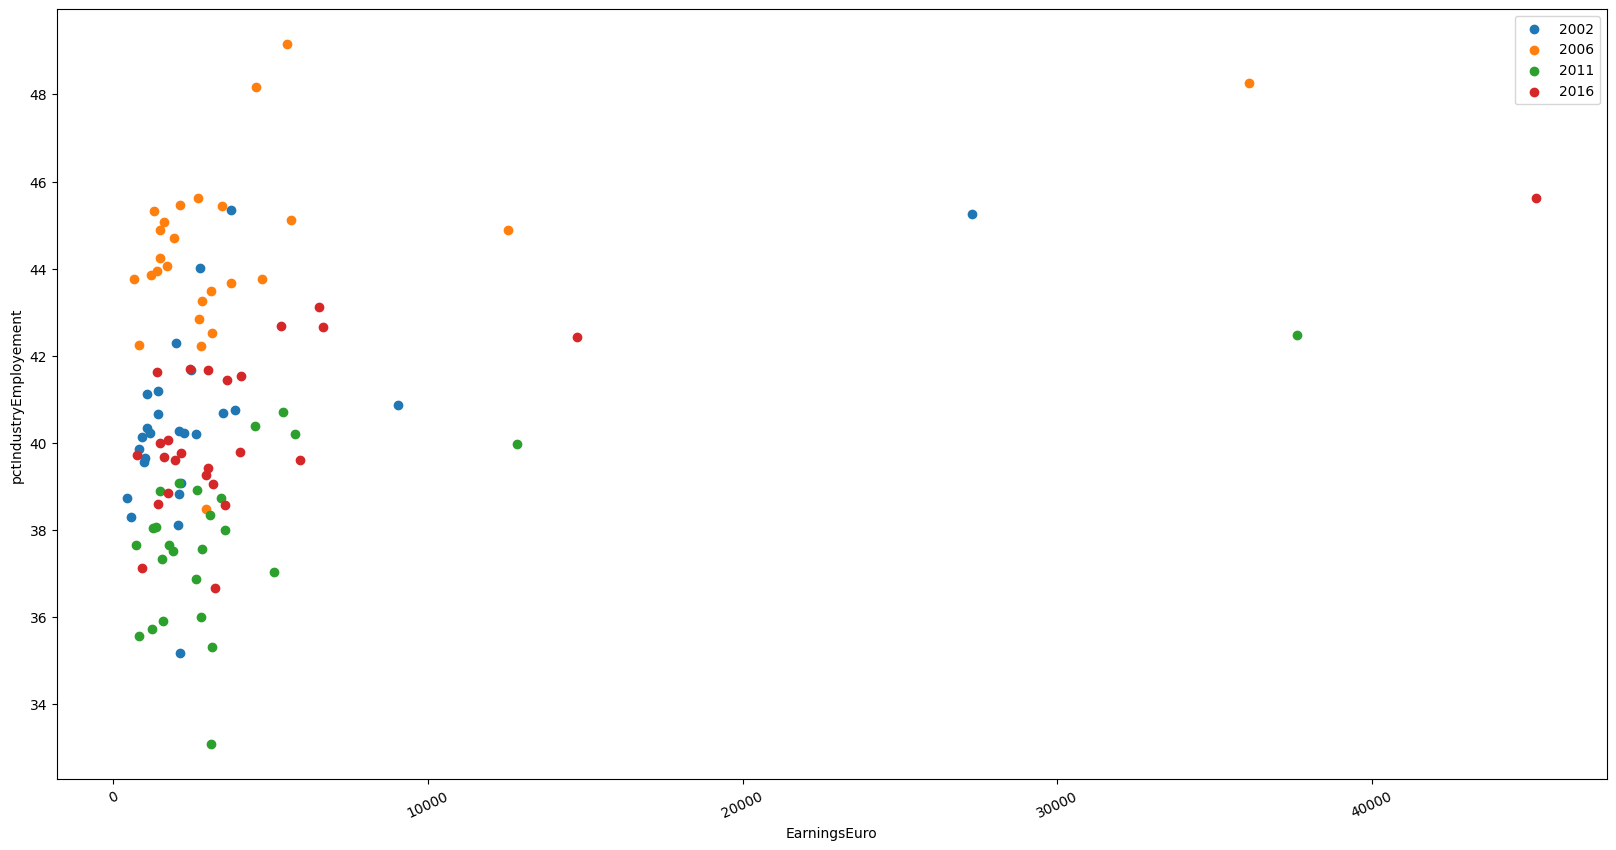

In [228]:
fig, ax = plt.subplots(figsize=(20, 10))

pct_working = joint_df[['County', 'pctIndustryEmployement', 'Year', 'Industry', 'EarningsEuro']]
pct_working = pct_working[pct_working['Industry']=='All industries']
pct_working = pct_working[pct_working['County'] != 'State']

pct_working_2002 = pct_working[pct_working['Year']==2002].sort_values(by='County').drop_duplicates()
pct_working_2006 = pct_working[pct_working['Year']==2006].sort_values(by='County').drop_duplicates()
pct_working_2011 = pct_working[pct_working['Year']==2011].sort_values(by='County').drop_duplicates()
pct_working_2016 = pct_working[pct_working['Year']==2016].sort_values(by='County').drop_duplicates()


# Rotating X-axis labels
plt.xticks(rotation = 25)
#r_1 = pct_working_2002['County']
ax.scatter(pct_working_2002['EarningsEuro'], pct_working_2002['pctIndustryEmployement'], label='2002')
ax.scatter(pct_working_2006['EarningsEuro'],  pct_working_2006['pctIndustryEmployement'], label='2006')
ax.scatter(pct_working_2011['EarningsEuro'],  pct_working_2011['pctIndustryEmployement'], label='2011')
ax.scatter(pct_working_2016['EarningsEuro'], pct_working_2016['pctIndustryEmployement'], label='2016')
#ax.plot(pct_working_2002['EarningsEuro'], pct_working_2002['pctIndustryEmployement'], label='2002')
#ax.plot(pct_working_2006['EarningsEuro'],  pct_working_2006['pctIndustryEmployement'], label='2006')
#ax.plot(pct_working_2011['EarningsEuro'],  pct_working_2011['pctIndustryEmployement'], label='2011')
#ax.plot(pct_working_2016['EarningsEuro'], pct_working_2016['pctIndustryEmployement'], label='2016')
ax.legend()
plt.xlabel("EarningsEuro")
plt.ylabel("pctIndustryEmployement")


Text(0, 0.5, 'pctIndustryEmployement')

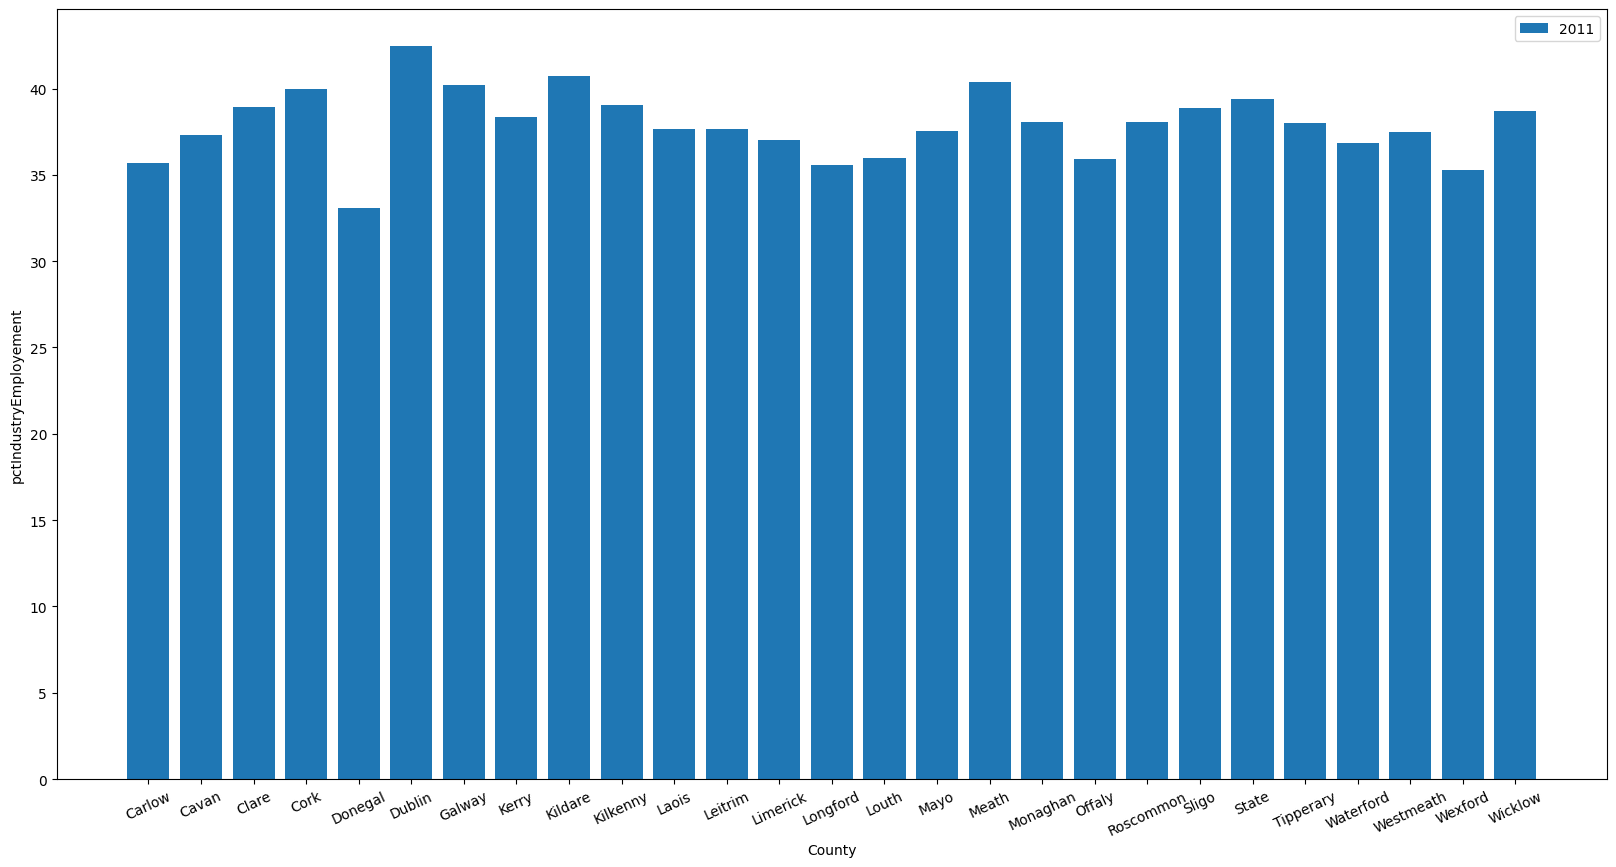

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

pct_working = joint_df[['County', 'pctIndustryEmployement', 'Year', 'Industry']]
pct_working = pct_working[pct_working['Industry']=='All industries']

pct_working_2002 = pct_working[pct_working['Year']==2002].sort_values(by='County').drop_duplicates()
pct_working_2006 = pct_working[pct_working['Year']==2006].sort_values(by='County').drop_duplicates()
pct_working_2011 = pct_working[pct_working['Year']==2011].sort_values(by='County').drop_duplicates()
pct_working_2016 = pct_working[pct_working['Year']==2016].sort_values(by='County').drop_duplicates()


# Rotating X-axis labels
plt.xticks(rotation = 25)
#r_1 = pct_working_2002['County']
#ax.bar(pct_working_2002['County'], pct_working_2002['pctIndustryEmployement'], label='2002')
#ax.bar(pct_working_2006['County'],  pct_working_2006['pctIndustryEmployement'], label='2006')
ax.bar(pct_working_2011['County'],  pct_working_2011['pctIndustryEmployement'], label='2011')

ax.legend()
plt.xlabel("County")
plt.ylabel("pctIndustryEmployement")


Text(0, 0.5, 'pctIndustryEmployement')

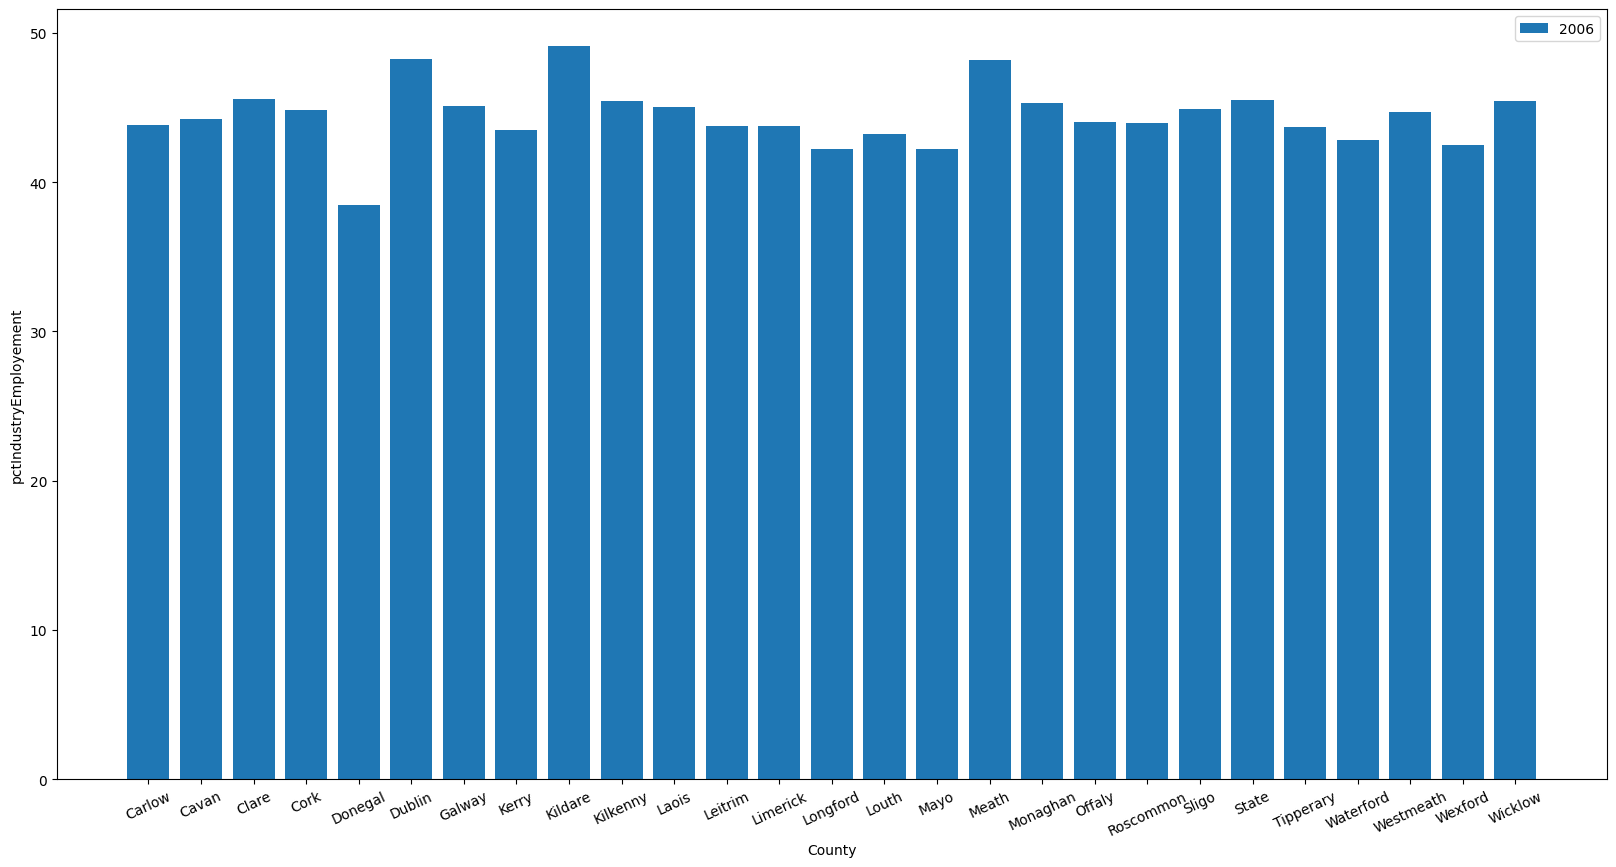

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

pct_working = joint_df[['County', 'pctIndustryEmployement', 'Year', 'Industry']]
pct_working = pct_working[pct_working['Industry']=='All industries']

pct_working_2002 = pct_working[pct_working['Year']==2002].sort_values(by='County').drop_duplicates()
pct_working_2006 = pct_working[pct_working['Year']==2006].sort_values(by='County').drop_duplicates()
pct_working_2011 = pct_working[pct_working['Year']==2011].sort_values(by='County').drop_duplicates()
pct_working_2016 = pct_working[pct_working['Year']==2016].sort_values(by='County').drop_duplicates()


# Rotating X-axis labels
plt.xticks(rotation = 25)
#r_1 = pct_working_2002['County']
#ax.bar(pct_working_2002['County'], pct_working_2002['pctIndustryEmployement'], label='2002')
ax.bar(pct_working_2006['County'],  pct_working_2006['pctIndustryEmployement'], label='2006')


ax.legend()
plt.xlabel("County")
plt.ylabel("pctIndustryEmployement")


Text(0, 0.5, 'pctIndustryEmployement')

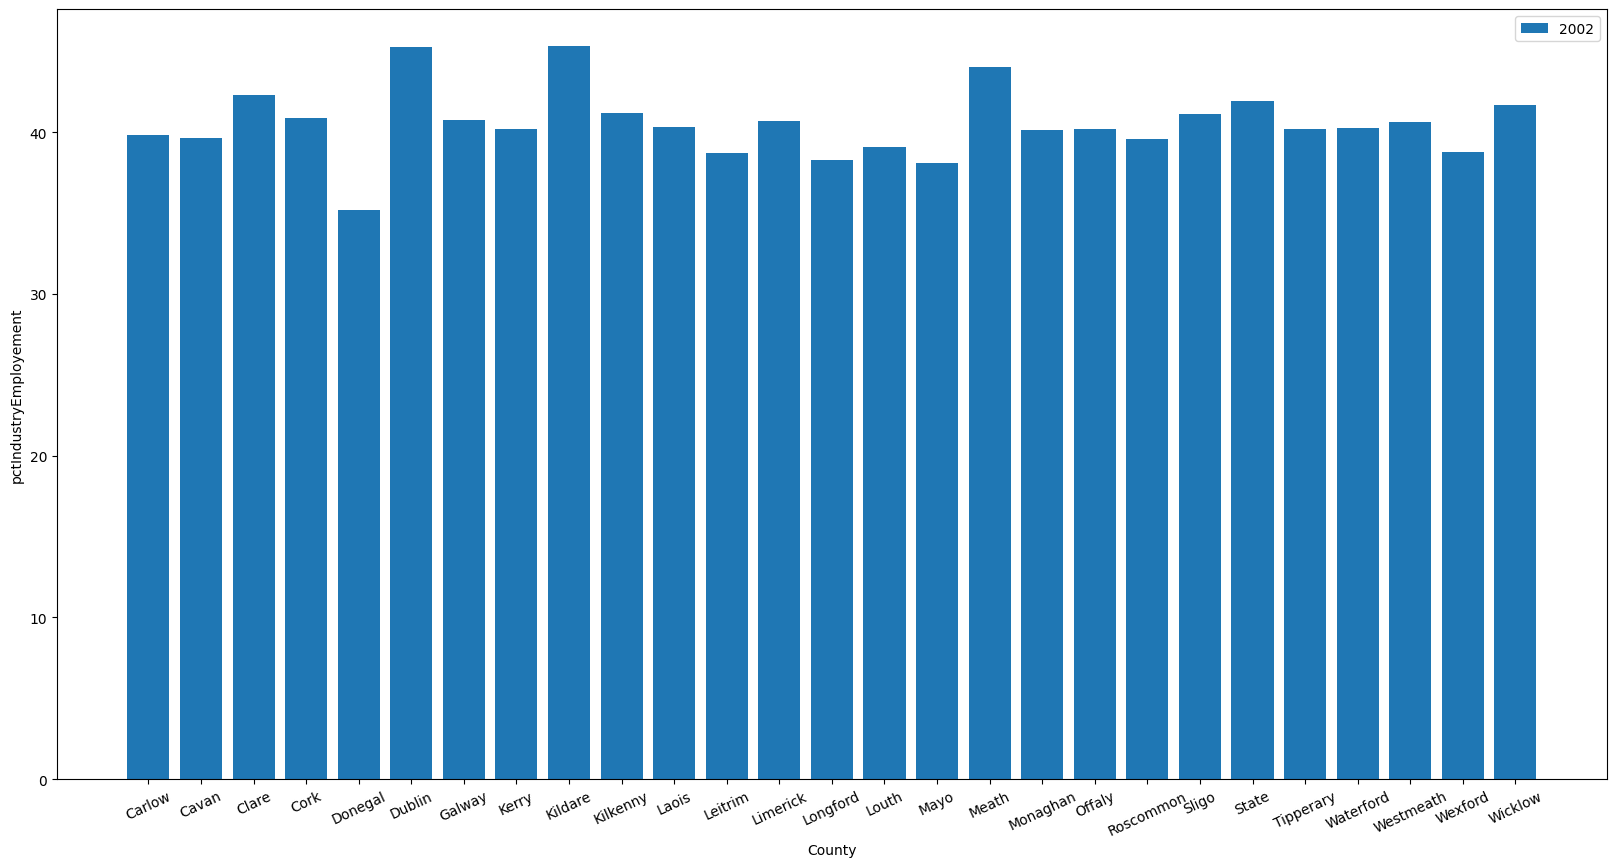

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

pct_working = joint_df[['County', 'pctIndustryEmployement', 'Year', 'Industry']]
pct_working = pct_working[pct_working['Industry']=='All industries']

pct_working_2002 = pct_working[pct_working['Year']==2002].sort_values(by='County').drop_duplicates()
pct_working_2006 = pct_working[pct_working['Year']==2006].sort_values(by='County').drop_duplicates()
pct_working_2011 = pct_working[pct_working['Year']==2011].sort_values(by='County').drop_duplicates()
pct_working_2016 = pct_working[pct_working['Year']==2016].sort_values(by='County').drop_duplicates()


# Rotating X-axis labels
plt.xticks(rotation = 25)
#r_1 = pct_working_2002['County']
ax.bar(pct_working_2002['County'], pct_working_2002['pctIndustryEmployement'], label='2002')



ax.legend()
plt.xlabel("County")
plt.ylabel("pctIndustryEmployement")


Text(0, 0.5, 'EarningsEuro')

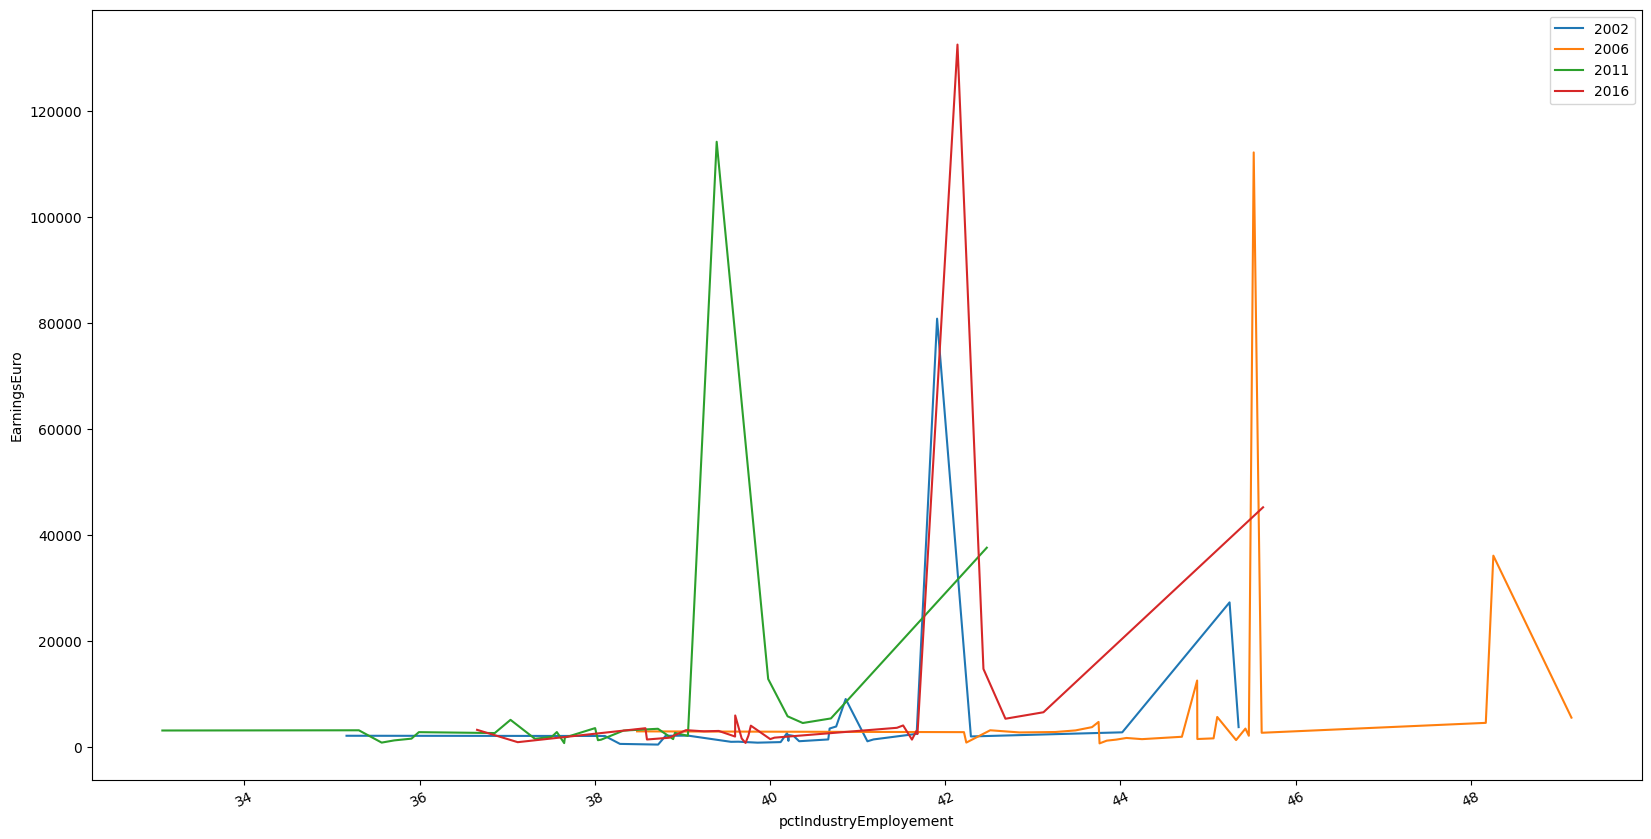

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

pct_working_income = joint_df[['County', 'pctIndustryEmployement', 'Year', 'Industry', 'EarningsEuro']]
pct_working_income = pct_working_income[pct_working_income['Industry']=='All industries']

pct_working_income_2002 = pct_working_income[pct_working_income['Year']==2002].sort_values(by='pctIndustryEmployement').drop_duplicates()
pct_working_income_2006 = pct_working_income[pct_working_income['Year']==2006].sort_values(by='pctIndustryEmployement').drop_duplicates()
pct_working_income_2011 = pct_working_income[pct_working_income['Year']==2011].sort_values(by='pctIndustryEmployement').drop_duplicates()
pct_working_income_2016 = pct_working_income[pct_working_income['Year']==2016].sort_values(by='pctIndustryEmployement').drop_duplicates()


# Rotating X-axis labels
plt.xticks(rotation = 25)
ax.plot(pct_working_income_2002['pctIndustryEmployement'], pct_working_income_2002['EarningsEuro'], label='2002')
ax.plot(pct_working_income_2006['pctIndustryEmployement'], pct_working_income_2006['EarningsEuro'], label='2006')
ax.plot(pct_working_income_2011['pctIndustryEmployement'], pct_working_income_2011['EarningsEuro'], label='2011')
ax.plot(pct_working_income_2016['pctIndustryEmployement'], pct_working_income_2016['EarningsEuro'], label='2016')
ax.legend()
plt.xlabel("pctIndustryEmployement")
plt.ylabel("EarningsEuro")


Text(0, 0.5, 'Population')

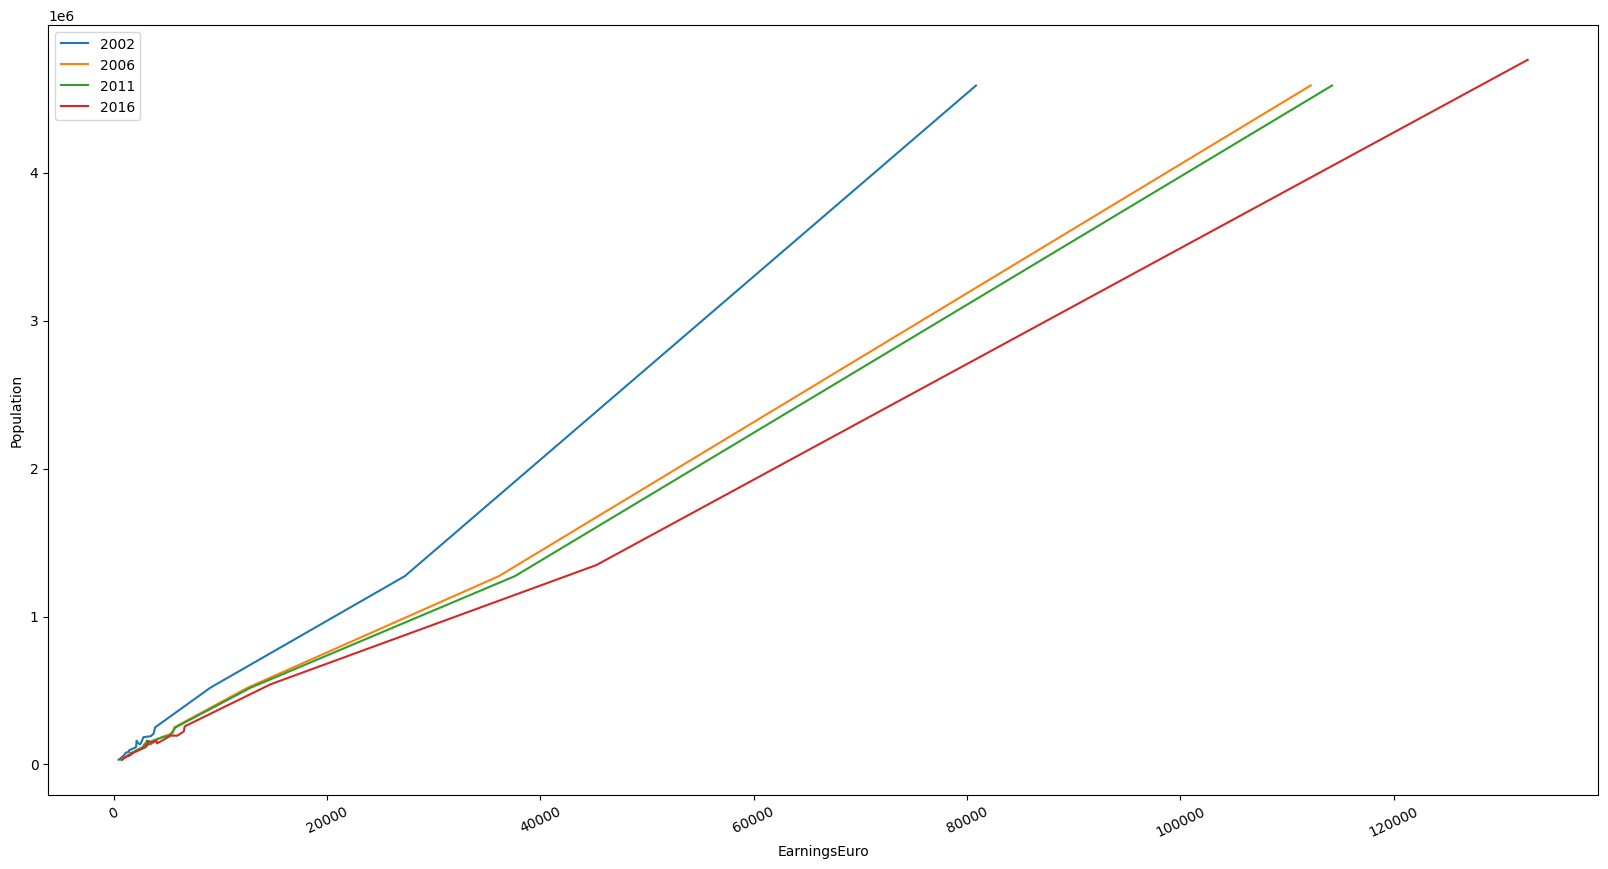

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

pct_working_income = joint_df[['County', 'pctIndustryEmployement', 'Year', 'Industry', 'EarningsEuro', 'Population']]
pct_working_income = pct_working_income[pct_working_income['Industry']=='All industries']

pct_working_income_2002 = pct_working_income[pct_working_income['Year']==2002].sort_values(by='EarningsEuro').drop_duplicates()
pct_working_income_2006 = pct_working_income[pct_working_income['Year']==2006].sort_values(by='EarningsEuro').drop_duplicates()
pct_working_income_2011 = pct_working_income[pct_working_income['Year']==2011].sort_values(by='EarningsEuro').drop_duplicates()
pct_working_income_2016 = pct_working_income[pct_working_income['Year']==2016].sort_values(by='EarningsEuro').drop_duplicates()


# Rotating X-axis labels
plt.xticks(rotation = 25)
ax.plot(pct_working_income_2002['EarningsEuro'], pct_working_income_2011['Population'], label='2002')
ax.plot(pct_working_income_2006['EarningsEuro'], pct_working_income_2011['Population'], label='2006')
ax.plot(pct_working_income_2011['EarningsEuro'], pct_working_income_2011['Population'], label='2011')
ax.plot(pct_working_income_2016['EarningsEuro'], pct_working_income_2016['Population'], label='2016')
ax.legend()
plt.xlabel("EarningsEuro")
plt.ylabel("Population")


<Axes: title={'center': 'Population'}, xlabel='Year'>

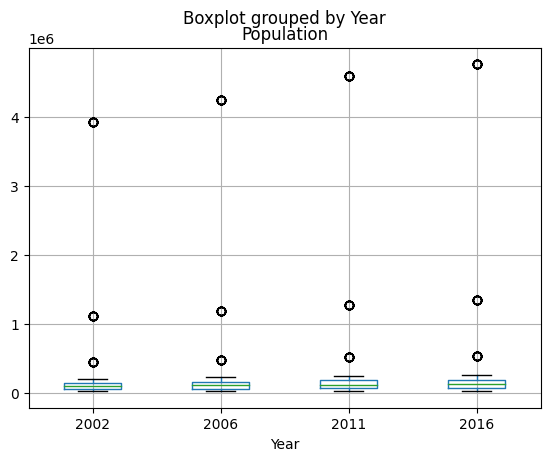

In [ ]:
joint_df.boxplot(column='Population', by='Year')

<Axes: title={'center': 'EarningsEuro'}, xlabel='Year'>

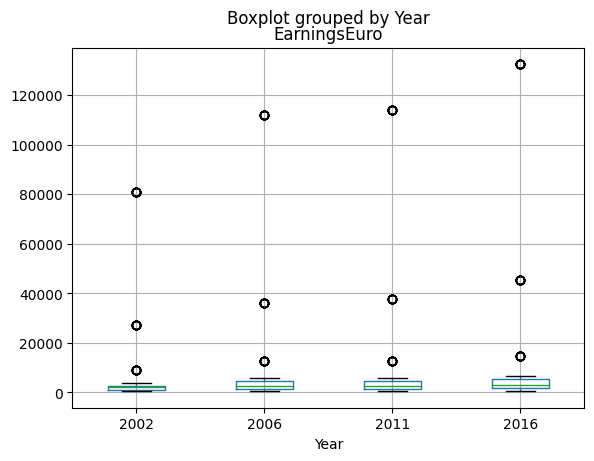

In [ ]:
joint_df.boxplot(column='EarningsEuro', by='Year')